In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the data
df = pd.read_csv('creditcard.csv')

# Check the data
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
# Check the distribution of target variable (Class)
print("\nDistribution of fraud and non-fraud transactions:")
print(df['Class'].value_counts())
print("\nPercentage of fraudulent transactions: {:.4f}%".format(df['Class'].value_counts()[1] / len(df) * 100))


Distribution of fraud and non-fraud transactions:
Class
0    284315
1       492
Name: count, dtype: int64

Percentage of fraudulent transactions: 0.1727%


In [5]:
# Separate features and labels
X = df.drop('Class', axis=1)
y = df['Class']

print(X.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27 

In [6]:
# Train Isolation Forest model
iso_forest = IsolationForest(contamination=0.0017, random_state=42)
# contamination parameter is set to the proportion of fraudulent transactions
yhat = iso_forest.fit_predict(X)

In [8]:
print(yhat)

# Convert predictions: -1 (anomaly) to 1 (fraud), 1 (normal) to 0 (normal)
yhat = np.where(yhat == -1, 1, 0)

print(yhat)

[1 1 1 ... 1 1 1]
[0 0 0 ... 0 0 0]



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.26      0.25      0.26       492

    accuracy                           1.00    284807
   macro avg       0.63      0.63      0.63    284807
weighted avg       1.00      1.00      1.00    284807



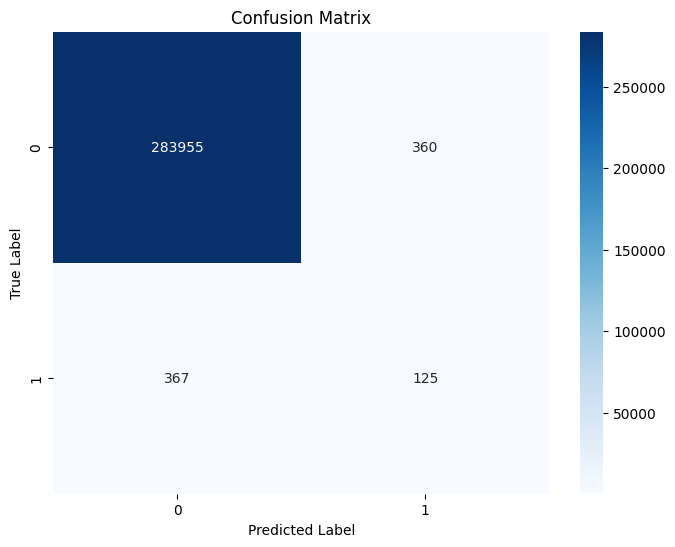

In [9]:
# Evaluate model performance
print("\nClassification Report:")
print(classification_report(y, yhat))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y, yhat)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

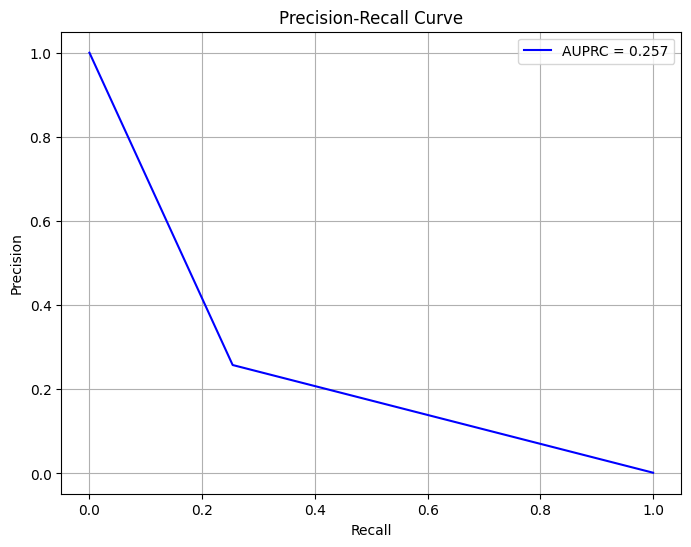

Area Under Precision-Recall Curve (AUPRC): 0.257
Average Precision Score: 0.138
Random Classifier AUPRC: 0.002


In [10]:
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

# Get the anomaly scores (decision_function gives scores that are opposite to score_samples)
y_scores = -iso_forest.score_samples(X)

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y, yhat)
auprc = auc(recall, precision)
ap = average_precision_score(y, y_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'AUPRC = {auprc:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

print(f"Area Under Precision-Recall Curve (AUPRC): {auprc:.3f}")
print(f"Average Precision Score: {ap:.3f}")

# You can also compare with a random classifier
random_auprc = len(y[y==1]) / len(y)  # ratio of positive class
print(f"Random Classifier AUPRC: {random_auprc:.3f}")

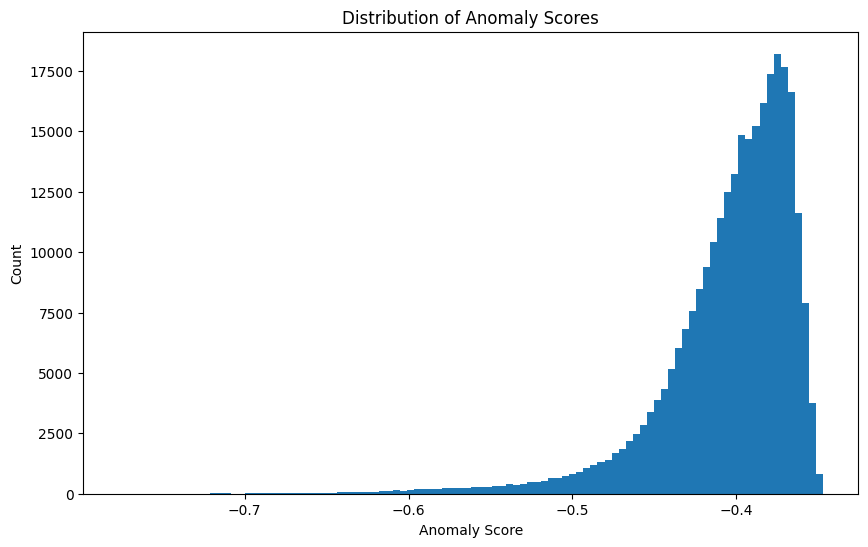

In [11]:
# Examine anomaly score distribution
scores = iso_forest.score_samples(X)
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=100)
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Count')
plt.show()

# Add anomaly scores to original dataframe
df['anomaly_score'] = scores

In [12]:
# Examine transactions detected as fraud
fraud_detected = df[yhat == 1]
print("\nNumber of detected fraudulent transactions:", len(fraud_detected))


Number of detected fraudulent transactions: 485


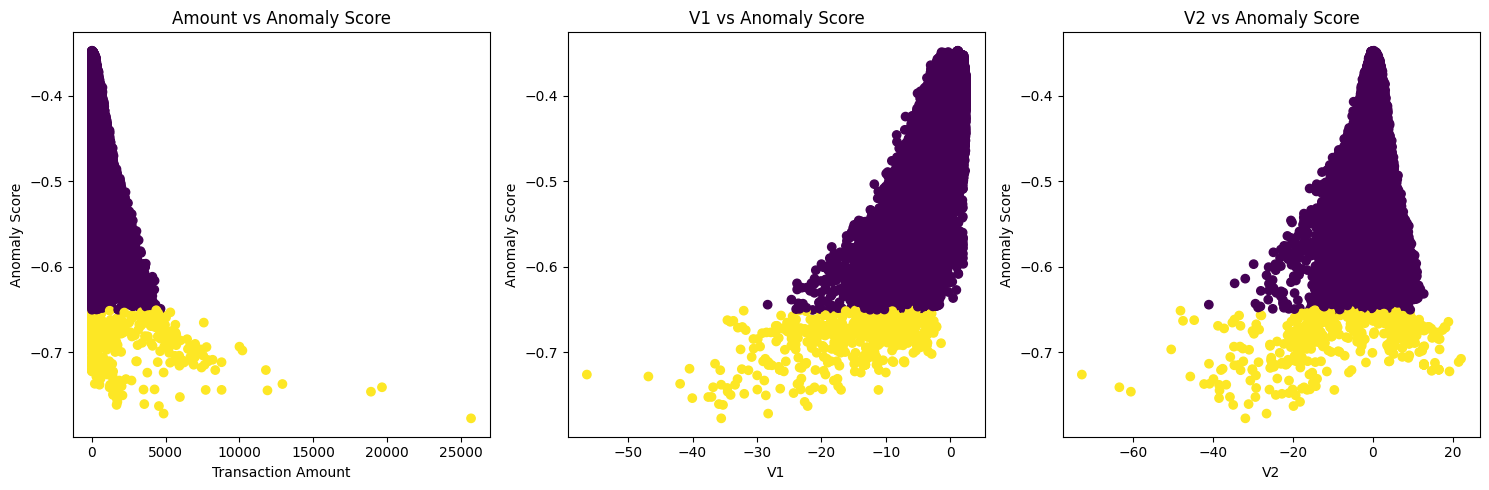

In [13]:
# Visualize distribution of important features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(df['Amount'], df['anomaly_score'], c=yhat, cmap='viridis')
plt.xlabel('Transaction Amount')
plt.ylabel('Anomaly Score')
plt.title('Amount vs Anomaly Score')

plt.subplot(1, 3, 2)
plt.scatter(df['V1'], df['anomaly_score'], c=yhat, cmap='viridis')
plt.xlabel('V1')
plt.ylabel('Anomaly Score')
plt.title('V1 vs Anomaly Score')

plt.subplot(1, 3, 3)
plt.scatter(df['V2'], df['anomaly_score'], c=yhat, cmap='viridis')
plt.xlabel('V2')
plt.ylabel('Anomaly Score')
plt.title('V2 vs Anomaly Score')

plt.tight_layout()
plt.show()

Original dataset shape: {0: 284315, 1: 492}
After undersampling: {0: 1640, 1: 492}
After SMOTE: {0: 1640, 1: 1640}

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.70      0.70       328
           1       0.70      0.71      0.71       328

    accuracy                           0.70       656
   macro avg       0.70      0.70      0.70       656
weighted avg       0.70      0.70      0.70       656



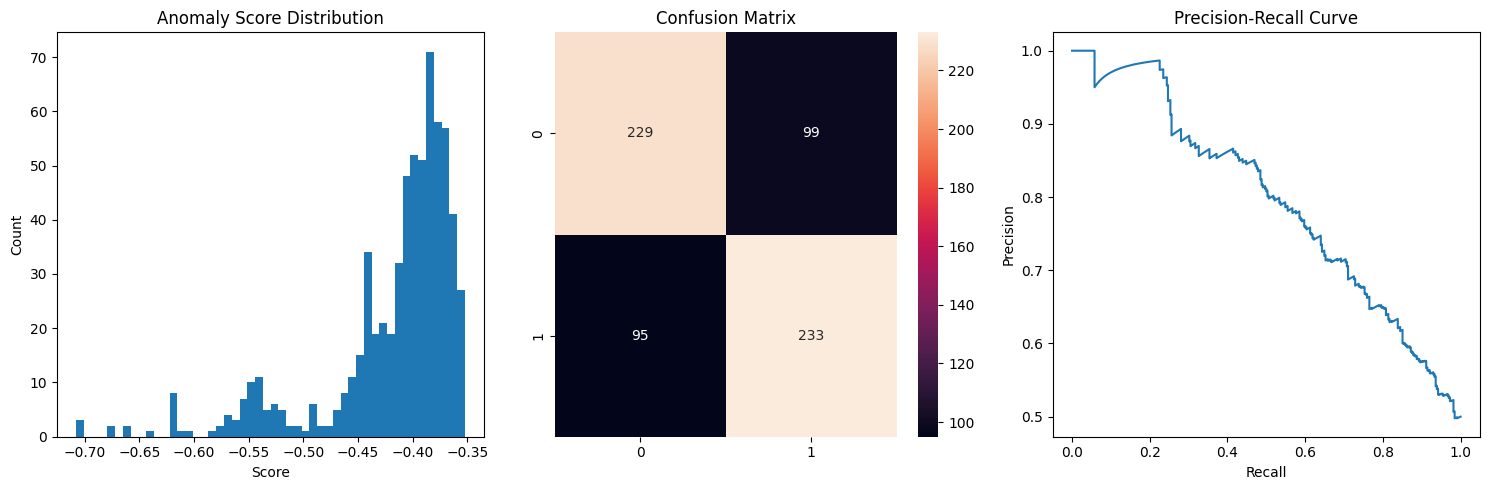

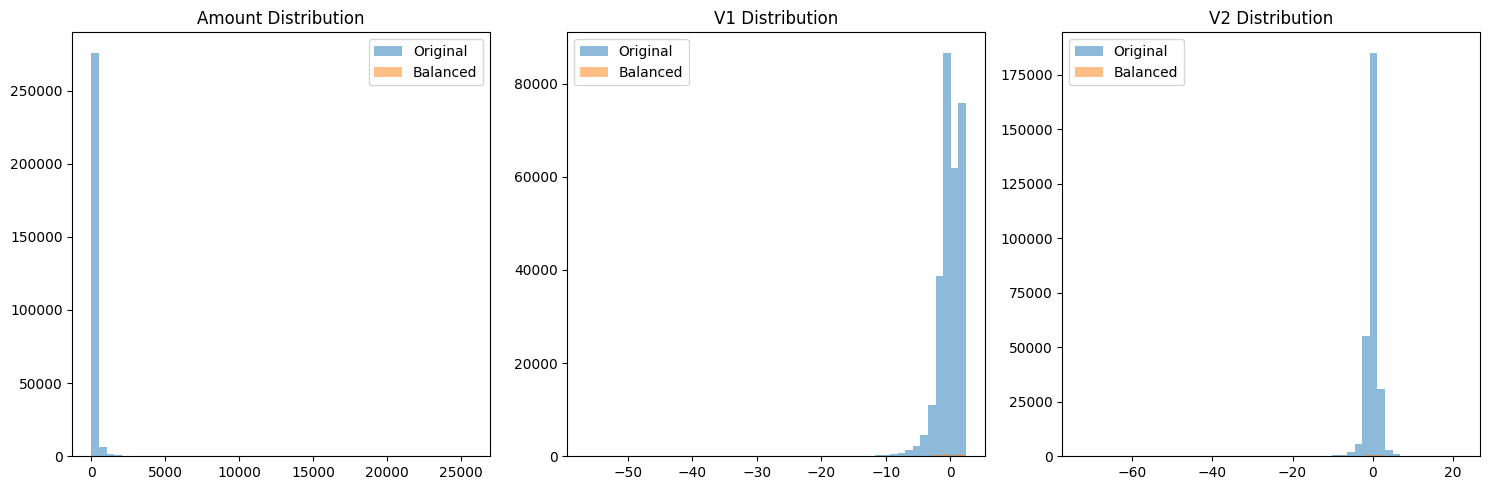

In [18]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

def balance_full_dataset(X, y, target_ratio=0.3):
    """
    Balance the entire dataset to make the ratio between classes closer
    Args:
        X: features
        y: labels
        target_ratio: desired ratio of minority to majority class (e.g., 0.3 means 1:3 ratio)
    Returns:
        Balanced X and y
    """
    print("Original dataset shape:", dict(zip(*np.unique(y, return_counts=True))))
    
    # First apply undersampling
    undersample = RandomUnderSampler(
        sampling_strategy=target_ratio,
        random_state=42
    )
    X_under, y_under = undersample.fit_resample(X, y)
    print("After undersampling:", dict(zip(*np.unique(y_under, return_counts=True))))
    
    # Then apply SMOTE
    smote = SMOTE(
        sampling_strategy='auto',  # Will make classes equal
        random_state=42,
        k_neighbors=5
    )
    X_balanced, y_balanced = smote.fit_resample(X_under, y_under)
    print("After SMOTE:", dict(zip(*np.unique(y_balanced, return_counts=True))))
    
    return X_balanced, y_balanced

# Modified main function to use balanced data
def main_with_balanced_data():
    # Balance the entire dataset first
    X_balanced, y_balanced = balance_full_dataset(X, y)
    
    # Train Isolation Forest on balanced data
    iso_forest = IsolationForest(
        contamination=0.5,  # Adjust because data is now more balanced
        random_state=42
    )
    
    # Split the balanced data
    X_train, X_test, y_train, y_test = train_test_split(
        X_balanced, y_balanced, 
        test_size=0.2, 
        random_state=42,
        stratify=y_balanced  # Maintain the balanced ratio in split
    )
    
    # Fit and predict
    iso_forest.fit(X_train)
    y_pred = iso_forest.predict(X_test)
    y_pred = np.where(y_pred == -1, 1, 0)
    
    # Evaluate
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Visualize results
    plt.figure(figsize=(15, 5))
    
    # 1. Score distribution
    plt.subplot(131)
    scores = iso_forest.score_samples(X_test)
    plt.hist(scores, bins=50)
    plt.title('Anomaly Score Distribution')
    plt.xlabel('Score')
    plt.ylabel('Count')
    
    # 2. Confusion Matrix
    plt.subplot(132)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    
    # 3. Precision-Recall curve
    plt.subplot(133)
    precision, recall, _ = precision_recall_curve(y_test, -scores)
    plt.plot(recall, precision)
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    
    plt.tight_layout()
    plt.show()
    
    return iso_forest, X_balanced, y_balanced

# Run the analysis with balanced data
iso_forest_balanced, X_balanced, y_balanced = main_with_balanced_data()

# Optional: Compare with original distribution
def compare_distributions(X_original, y_original, X_balanced, y_balanced):
    """
    Compare feature distributions before and after balancing
    """
    plt.figure(figsize=(15, 5))
    
    # Compare a few key features
    features_to_plot = ['Amount', 'V1', 'V2']
    for i, feature in enumerate(features_to_plot, 1):
        plt.subplot(1, 3, i)
        
        # Original distribution
        plt.hist(X_original[feature], alpha=0.5, label='Original', bins=50)
        # Balanced distribution
        plt.hist(X_balanced[feature], alpha=0.5, label='Balanced', bins=50)
        
        plt.title(f'{feature} Distribution')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Compare distributions
compare_distributions(X, y, X_balanced, y_balanced)